# Assignment 1

## Percep Learning Rule

In [808]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import pandas as pd    
 
# from drawnow import drawnow

n = 100
meanA = [1.7, 1.7]
meanB = [-1.7, -1.7]
sigmaA = 0.5
sigmaB = 0.5

class MultiVar_Normal_Distri:
    bias_constant = 1

    def __init__(self, mean, cov, n):
        self.mean = mean
        self.cov = cov
        self.n = n
        self.labels = []
        self.give_distributions()
        self.vector = self.get_vector()
        self.set_labels()
        self.set_data()

    
    def give_distributions(self):
        self.x = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[1])[0] 

    def get_vector(self):
        if self.x[0] < 0 or self.y[0] < 0 :
            return -1*(np.multiply(self.x, self.y))
        else:
            return np.multiply(self.x, self.y)
    
    def set_labels(self):
        for i in self.vector:
            if i > 0:
                self.labels.append(1.0)
            else:
                self.labels.append(0)

    def set_data(self):
        bias = self.bias_constant*np.ones(len(self.x))
        self.training_data = np.array([list(self.x), list(self.y), bias, list(self.labels)])
        self.training_data = np.transpose(self.training_data)
        # np.random.shuffle(self.training_data)
        self.X = self.training_data[:, 0:3]
        self.Y = self.training_data[:, 3]

def randomise_data(dataA, dataB):
    all_data = np.concatenate((dataA,dataB), axis=0)
    np.random.shuffle(all_data)

    inputs = all_data[:, 0:3]
    labels = all_data[:, 3:4]
    return all_data, inputs, labels

def plot_data(dataA, dataB): 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.title('Data Set A1 vs B1') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

def plot_decision_boundry(dataA, dataB, weight_set):
    x_weight = weight_set[0]
    y_weight = weight_set[1]

    constant = x_weight**2 + y_weight**2
    d_y = []
    d_x = []
    for i in range(-100, 100, 1):
        inc = i/100
        d_y.append((constant-x_weight*inc)/y_weight)
        d_x.append(inc)
 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and the decision boundry') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    orange = mpatches.Patch(color='orange', label='Boundry')
    plt.legend(handles=[blue, red, orange])
    plt.ylim([-4, 4])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

def get_batch(X, Y, batch_size, index):
    return X[batch_size*index:batch_size*(index+1)], Y[batch_size*index:batch_size*(index+1)]

def h_output(x_batch, weight_matrix):
    return np.where(np.dot(x_batch,weight_matrix) > 0, 1, 0)


## Generation of linearly seperable data


In [809]:
dataA = MultiVar_Normal_Distri(meanA, sigmaA, n)
dataB = MultiVar_Normal_Distri(meanB, sigmaB, n)
randomised_data, inputs, targets = randomise_data(dataA.training_data, dataB.training_data)

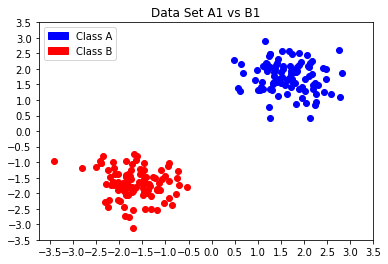

In [810]:
plot_data(dataA, dataB)

In [811]:
class Percep:
    def __init__(self, inputs, targets, num_nodes, eta, epochs=10, batch = True):
        self.inputs = inputs
        self.targets = targets 
        self.batch = batch
        self.sample_size = len(targets)
        self.num_nodes = num_nodes
        self.epochs = epochs
        self.eta = eta

        self.init_weights()
        self.weight_set = []
        self.weight_set.append(self.weights)

        self.seq_weight_set = []
        self.seq_weight_set.append(self.weights)

    def init_weights(self):
        # (2+1)x1 matrix 
        self.weights = np.array([ [-0.1], 
                                  [0.2],
                                  [0.3]])
    def selector(self):
        if self.batch:
            self.epochs = self.epochs
            self.batch_training()
        else:
            self.epochs = 0
            self.sequential_training()
        
    def bck_pass(self):
        self.error = self.output - targets
        for i in range(0, len(self.error)):
            # change = eta*np.dot(np.reshape(self.inputs[i], (-1,1)), self.error[i])
            self.weights = self.weights - np.reshape( ( eta*np.dot( np.reshape(self.inputs[i], (-1,1)), self.error[i] ) )/len(self.error), (-1,1))

    def batch_training(self):
        # run through sample set per epoch
        self.error_term = []
        for e in range(0, self.epochs):
            # sample out for this epoch
            self.output = np.dot(self.inputs, self.weights)
            # activator out
            for ii in range(0, len(self.output)):
                if self.output[ii] > 0:
                    self.output[ii] = 1
                else:
                    self.output[ii] = 1
            # update weights 
            self.bck_pass()
            self.MSE_epoch()
            self.weight_set.append(self.weights)
    
    def MSE_epoch(self):
        self.error_term.append((0.5*((sum(self.error))**2)) / len(self.error))
        # print("Epoch ", e, " has error ", error_term)

    def sequential_training(self):
        self.seq_output = []
        self.seq_error = []
        self.seq_error_term = []

        for i in range(0, self.sample_size):
            self.seq_output.append(np.dot(self.inputs[i], self.weights))

            if self.seq_output[i] > 0:
                self.seq_output[i] = 1
            else:
                self.seq_output[i] = 1
            
            self.seq_error.append(self.seq_output[i] - targets[i])
            self.seq_error_term.append(0.5*((self.seq_error[i])**2))
            
            self.weights = self.weights - np.reshape( ( eta*np.dot( np.reshape(self.inputs[i], (-1,1)), self.seq_error[i] ) ), (-1,1))

            self.seq_weight_set.append(self.weights)

    def train(self):
        self.selector()
        return self.weights


In [812]:
num_nodes = 1
eta = 0.01
epochs = 20

perceptron_p_batch = Percep(inputs,targets, num_nodes, eta, epochs)

In [813]:
classification_weights = perceptron_p_batch.train()


### Plot final decision boundry

In [814]:
def plot_decision_boundry(dataA, dataB, weight_set):
    x_weight = weight_set[0]
    y_weight = weight_set[1]

    constant = x_weight**2 + y_weight**2
    d_y = []
    d_x = []
    for i in range(-100, 100, 1):
        inc = i/100
        d_y.append((constant-x_weight*inc)/y_weight)
        d_x.append(inc)
 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and the final decision boundry') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    orange = mpatches.Patch(color='orange', label='Boundry')
    plt.legend(handles=[blue, red, orange])
    plt.ylim([-4, 4])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

### Plot all decision boundries

In [815]:
def plot_decision_boundry2(dataA, dataB, weight_set):
    plt.figure() 
    
    for i in range(0, len(weight_set)):
        x_weight = weight_set[i][0]
        y_weight = weight_set[i][1]

        constant = x_weight**2 + y_weight**2
        d_y = []
        d_x = []
        for i in range(-100, 100, 1):
            inc = i/100
            d_y.append((constant-x_weight*inc)/y_weight)
            d_x.append(inc)

        plt.plot(d_x, d_y,)

    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    # plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and all of the decision boundries') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    plt.ylim([-4, 4])
    plt.xticks(np.arange(-3.5, 3.6, 0.5))
    plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show() 

### Batch Learning

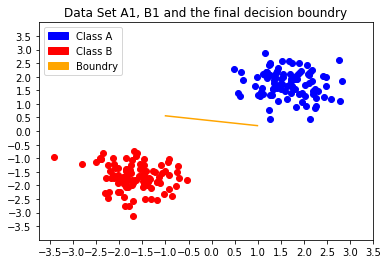

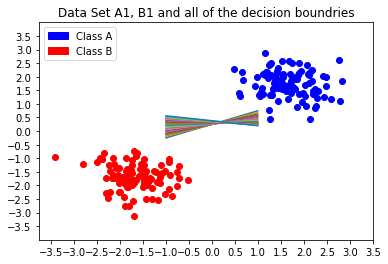

In [816]:
plot_decision_boundry(dataA, dataB, perceptron_p_batch.weights)
plot_decision_boundry2(dataA, dataB, perceptron_p_batch.weight_set)

### Sequential Learning

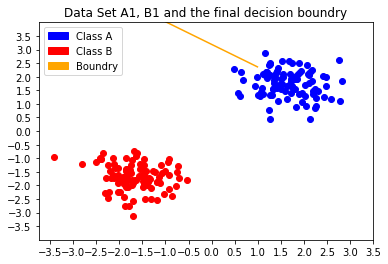

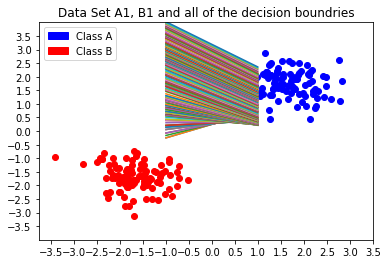

In [817]:
### Sequential Training
perceptron_p_nobatch = Percep(inputs,targets, num_nodes, eta, epochs, batch=False)
classification_weights = perceptron_p_nobatch.train()

plot_decision_boundry(dataA, dataB, perceptron_p_nobatch.weights)
plot_decision_boundry2(dataA, dataB, perceptron_p_nobatch.seq_weight_set)

## Delta Rule

In [818]:
class Delta:
    def __init__(self, inputs, targets, num_nodes, eta, epochs=10, batch = True):
        self.inputs = inputs
        self.targets = targets 
        self.batch = batch
        self.sample_size = len(targets)
        self.num_nodes = num_nodes
        self.epochs = epochs
        self.eta = eta

        self.init_weights()
        self.weight_set = []
        self.weight_set.append(self.weights)

        self.seq_weight_set = []
        self.seq_weight_set.append(self.weights)

    def init_weights(self):
        # (2+1)x1 matrix 
        self.weights = np.array([ [-0.1], 
                                  [0.2],
                                  [0.3]])
    def selector(self):
        if self.batch:
            self.epochs = self.epochs
            self.batch_training()
        else:
            self.epochs = 0
            self.sequential_training()
        
    def bck_pass(self):
        # self.error = self.output - targets
        for i in range(0, len(self.error)):
            # change = eta*np.dot(np.reshape(self.inputs[i], (-1,1)), self.error[i])
            self.weights = self.weights - np.reshape( ( eta*np.dot( np.reshape(self.inputs[i], (-1,1)), self.error[i] ) )/len(self.error), (-1,1))

    def batch_training(self):
        self.error_term = []
        # run through sample set per epoch
        for e in range(0, self.epochs):
            # sample out for this epoch
            self.output = np.dot(self.inputs, self.weights)
            self.error = self.output - targets
            # activator out
            for ii in range(0, len(self.output)):
                if self.output[ii] > 0:
                    self.output[ii] = 1
                else:
                    self.output[ii] = 1
            # update weights 
            self.bck_pass()
            self.MSE_epoch()
            self.weight_set.append(self.weights)
    
    def MSE_epoch(self):
        self.error_term.append((0.5*((sum(self.error))**2)) / len(self.error))
    
    def sequential_training(self):
        self.seq_output = []
        self.seq_error = []
        self.seq_error_term = []

        for i in range(0, self.sample_size):
            self.seq_output.append(np.dot(self.inputs[i], self.weights))
            self.seq_error.append(self.seq_output[i] - targets[i])

            if self.seq_output[i] > 0:
                self.seq_output[i] = 1
            else:
                self.seq_output[i] = 1
            
            self.seq_error.append(self.seq_output[i] - targets[i])
            self.seq_error_term.append(0.5*((self.seq_error[i])**2))

            self.weights = self.weights - np.reshape( ( eta*np.dot( np.reshape(self.inputs[i], (-1,1)), self.seq_error[i] ) ), (-1,1))

            self.seq_weight_set.append(self.weights)

    def train(self):
        self.selector()
        return self.weights


### Batch Delta

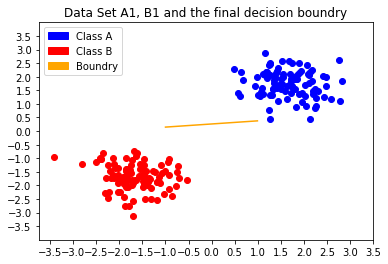

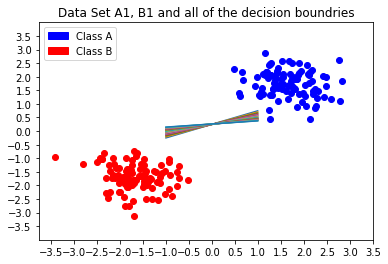

In [819]:
perceptron = Delta(inputs,targets, num_nodes, eta, epochs, batch=True)
classification_weights = perceptron.train()

plot_decision_boundry(dataA, dataB, perceptron.weights)
plot_decision_boundry2(dataA, dataB, perceptron.weight_set)

### Sequential Delta

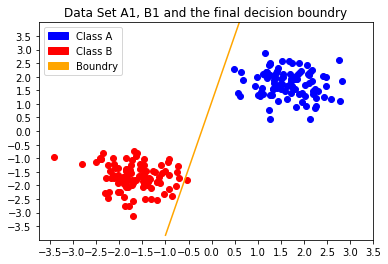

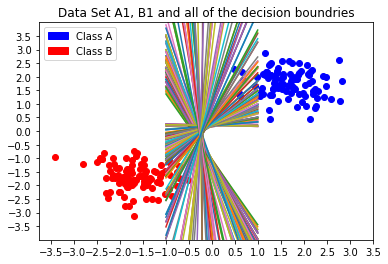

In [820]:
seq_perceptron = Delta(inputs,targets, num_nodes, eta, epochs, batch=False)
classification_weights = seq_perceptron.train()

plot_decision_boundry(dataA, dataB, seq_perceptron.weights)
plot_decision_boundry2(dataA, dataB, seq_perceptron.seq_weight_set)

### Batch Delta without Bias

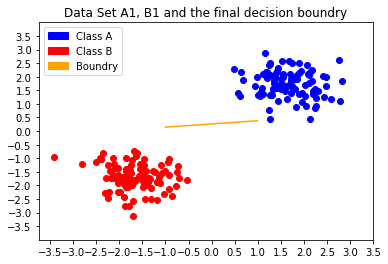

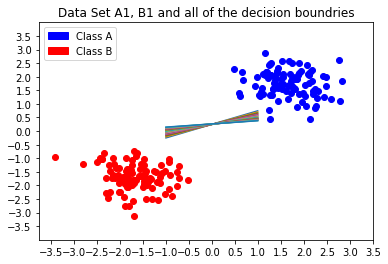

In [821]:
perceptron_no_bias = Delta(inputs*[1,1,0],targets, num_nodes, eta, epochs)
classification_weights = perceptron_no_bias.train()

plot_decision_boundry(dataA, dataB, perceptron_no_bias.weights)
plot_decision_boundry2(dataA, dataB, perceptron_no_bias.weight_set)

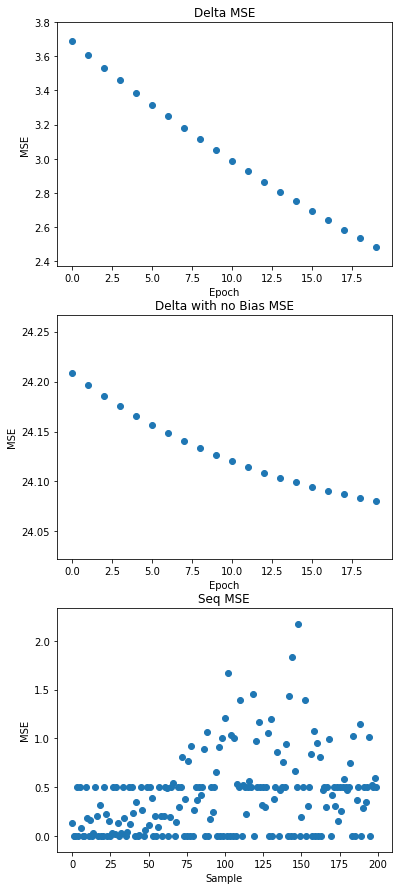

In [822]:
# Delta MSE 
delta_MSE = perceptron.error_term
x1 = list(range(len(delta_MSE)))
# Delta no bias MSE 
delta_MSE_no_bias = perceptron_no_bias.error_term
x2 = list(range(len(delta_MSE_no_bias)))
# Seq MSE 
seq_MSE = seq_perceptron.seq_error_term
x3 = list(range(len(seq_MSE)))


plt.figure()
# plot the points 
plt.subplot(311)
plt.scatter(x1,delta_MSE)  
plt.ylabel('MSE') 
plt.xlabel('Epoch')
plt.title('Delta MSE') 

plt.subplot(312)
plt.scatter(x2,delta_MSE_no_bias)
plt.ylabel('MSE') 
plt.xlabel('Epoch')
plt.title('Delta with no Bias MSE') 

plt.subplot(313)
plt.scatter(x3,seq_MSE)
plt.ylabel('MSE') 
plt.xlabel('Sample')
plt.title('Seq MSE') 

plt.subplots_adjust(left=None, bottom=-2, right=None, top=None, wspace=None, hspace=None)
# display the plot 
plt.show()  

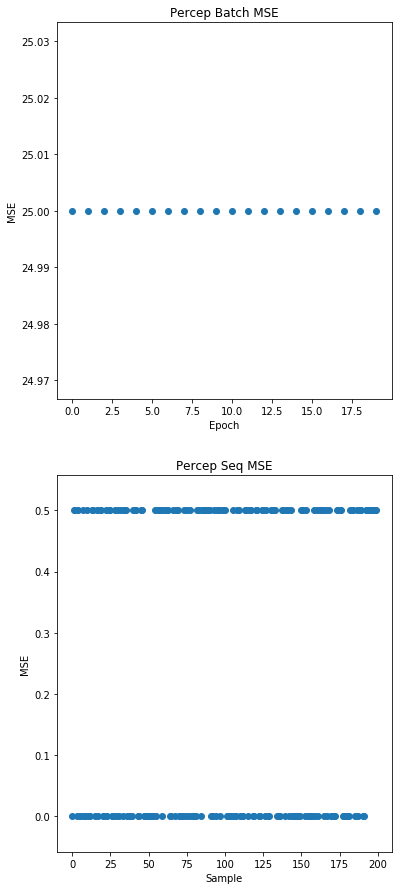

In [823]:
# Percep Batch MSE 
delta_MSE = perceptron_p_batch.error_term
x1 = list(range(len(delta_MSE)))
# Percep Seq MSE 
seq_MSE = perceptron_p_nobatch.seq_error_term
x2 = list(range(len(seq_MSE)))


plt.figure()
# plot the points 
plt.subplot(211)
plt.scatter(x1,delta_MSE)  
plt.ylabel('MSE') 
plt.xlabel('Epoch')
plt.title('Percep Batch MSE') 

plt.subplot(212)
plt.scatter(x2,seq_MSE)
plt.ylabel('MSE') 
plt.xlabel('Sample')
plt.title('Percep Seq MSE') 



plt.subplots_adjust(left=None, bottom=-2, right=None, top=None, wspace=None, hspace=None)
# display the plot 
plt.show()  

# 3.1.3 Classification of samples that are not linearly seperable

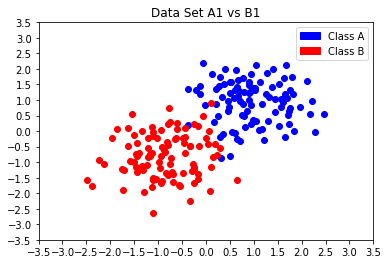

In [824]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n = 100
meanA = [0.9, 0.9]
meanB = [-0.9, -0.9]
sigmaA = 0.7
sigmaB = 0.7

dataA = MultiVar_Normal_Distri(meanA, sigmaA, n)
dataB = MultiVar_Normal_Distri(meanB, sigmaB, n)
randomised_data, inputs, targets = randomise_data(dataA.training_data, dataB.training_data)

plot_data(dataA, dataB)

## Perceptron Learning Rule 

In [825]:
num_nodes = 1
eta = 0.01
epochs = 20

### P Batch

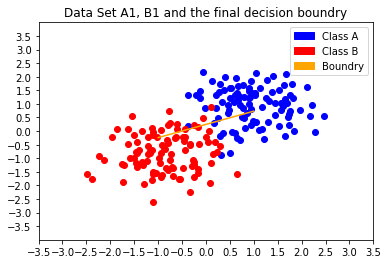

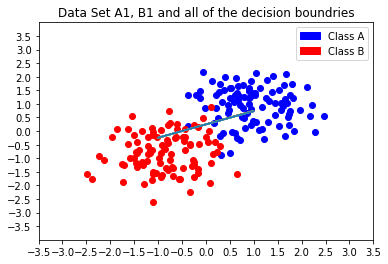

In [826]:
# Percep Batch
perceptron = Percep(inputs,targets, num_nodes, eta, epochs)
classification_weights = perceptron.train()
plot_decision_boundry(dataA, dataB, perceptron.weights)
plot_decision_boundry2(dataA, dataB, perceptron.weight_set)

### P Sequential

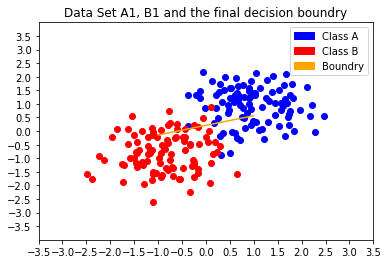

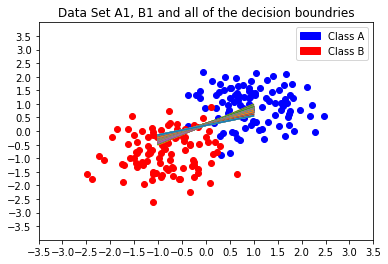

In [827]:
# Percep Seq
seq_perceptron = Percep(inputs,targets, num_nodes, eta, epochs, batch=False)
classification_weights = seq_perceptron.train()
plot_decision_boundry(dataA, dataB, seq_perceptron.weights)
plot_decision_boundry2(dataA, dataB, seq_perceptron.seq_weight_set)

## Delta Learning Rule

### D Batch

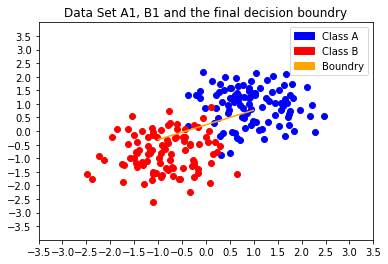

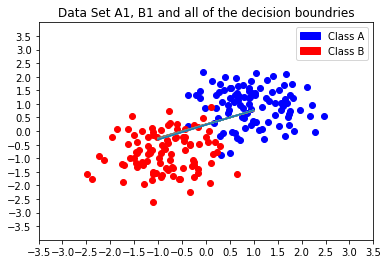

In [828]:
# Delta Batch
perceptron = Delta(inputs,targets, num_nodes, eta, epochs, batch=True)
classification_weights = perceptron.train()
plot_decision_boundry(dataA, dataB, perceptron.weights)
plot_decision_boundry2(dataA, dataB, perceptron.weight_set)

### D Seq

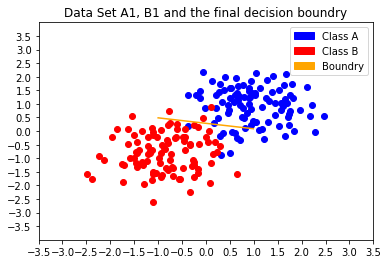

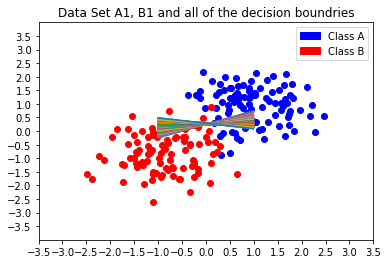

In [829]:
# Delta Seq
seq_perceptron = Delta(inputs,targets, num_nodes, eta, epochs, batch=False)
classification_weights = seq_perceptron.train()
plot_decision_boundry(dataA, dataB, seq_perceptron.weights)
plot_decision_boundry2(dataA, dataB, seq_perceptron.seq_weight_set)

### D Batch no bias

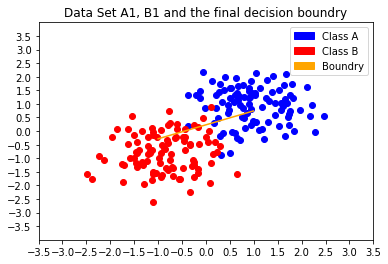

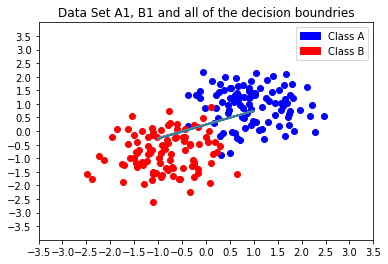

In [830]:
# Delta Batch without Bias
perceptron_no_bias = Delta(inputs*[1,1,0],targets, num_nodes, eta, epochs)
classification_weights = perceptron_no_bias.train()
plot_decision_boundry(dataA, dataB, perceptron_no_bias.weights)
plot_decision_boundry2(dataA, dataB, perceptron_no_bias.weight_set)

### Compare Errros for Delta

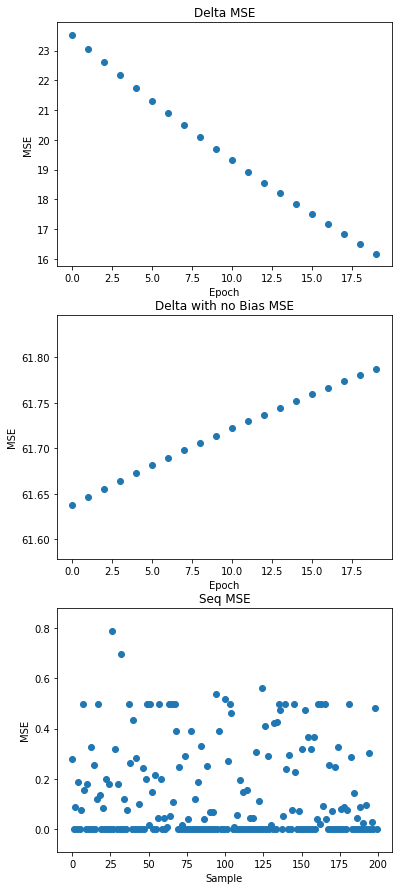

In [831]:
# Delta MSE 
delta_MSE = perceptron.error_term
x1 = list(range(len(delta_MSE)))
# Delta no bias MSE 
delta_MSE_no_bias = perceptron_no_bias.error_term
x2 = list(range(len(delta_MSE_no_bias)))
# Seq MSE 
seq_MSE = seq_perceptron.seq_error_term
x3 = list(range(len(seq_MSE)))


plt.figure()
# plot the points 
plt.subplot(311)
plt.scatter(x1,delta_MSE)  
plt.ylabel('MSE') 
plt.xlabel('Epoch')
plt.title('Delta MSE') 

plt.subplot(312)
plt.scatter(x2,delta_MSE_no_bias)
plt.ylabel('MSE') 
plt.xlabel('Epoch')
plt.title('Delta with no Bias MSE') 

plt.subplot(313)
plt.scatter(x3,seq_MSE)
plt.ylabel('MSE') 
plt.xlabel('Sample')
plt.title('Seq MSE') 

plt.subplots_adjust(left=None, bottom=-2, right=None, top=None, wspace=None, hspace=None)
# display the plot 
plt.show()  


# 3.13 Part 2

## Generate Data

In [832]:

class Data:
    def __init__(self, mean, cov, n, change=False):
        self.mean = mean
        self.cov = cov
        self.n = n
        self.labels = []
        if change:
            self.give_distributions2()
        else:
            self.give_distributions()
        self.set_labels()
        self.set_data()

    def give_distributions(self):
        self.x = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, self.n), self.cov ) + self.mean[1])[0] 

    def give_distributions2(self):
        self.x = (np.multiply( np.random.randn(1, round(0.5*self.n)), self.cov ) - self.mean[0])[0]
        self.y = (np.multiply( np.random.randn(1, round(0.5*self.n)), self.cov ) + self.mean[1])[0] 
    
    def set_labels(self):
        for i in range(0, len(self.x)):
            if self.y[i] > 0:
                self.labels.append(1.0)
            else:
                self.labels.append(-1)

    def set_data(self):
        bias = -1*np.ones(len(self.x))
        self.training_data = np.array([list(self.x), list(self.y), bias, list(self.labels)])
        self.training_data = np.transpose(self.training_data)
        # np.random.shuffle(self.training_data)
        self.X = self.training_data[:, 0:3]
        self.Y = self.training_data[:, 3]

def randomise_data(dataA, dataB):
    all_data = np.concatenate((dataA,dataB), axis=0)
    np.random.shuffle(all_data)

    inputs = all_data[:, 0:3]
    labels = all_data[:, 3:4]
    return all_data, inputs, labels

def plot_data(dataA, dataB): 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.title('Data Set A1 vs B1') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    # plt.xticks(np.arange(-3.5, 3.6, 0.5))
    # plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   

# def plot_decision_boundry(dataA, dataB, weight_set):
#     x_weight = weight_set[0]
#     y_weight = weight_set[1]

#     constant = x_weight**2 + y_weight**2
#     d_y = []
#     d_x = []
#     for i in range(-100, 100, 1):
#         inc = i/100
#         d_y.append((constant-x_weight*inc)/y_weight)
#         d_x.append(inc)
 
#     plt.figure() 
#     plt.scatter(dataA.x, dataA.y, color='blue')
#     plt.scatter(dataB.x, dataB.y, color='red')
#     plt.plot(d_x, d_y, color='orange')
#     plt.title('Data Set A1, B1 and the decision boundry') 
#     blue = mpatches.Patch(color='blue', label='Class A')
#     red = mpatches.Patch(color='red', label='Class B')
#     orange = mpatches.Patch(color='orange', label='Boundry')
#     plt.legend(handles=[blue, red, orange])
#     # plt.ylim([-4, 4])
#     # plt.xticks(np.arange(-3.5, 3.6, 0.5))
#     # plt.yticks(np.arange(-3.5, 3.6, 0.5))
#     plt.show()   

## Plotting Functions

In [833]:
def plot_decision_boundry(dataA, dataB, weight_set):
    x_weight = weight_set[0]
    y_weight = weight_set[1]
    theta = weight_set[2]

    constant = x_weight**2 + y_weight**2 
    d_y = []
    d_x = []
    for i in range(-100, 100, 1):
        inc = i/100
        d_y.append((constant-x_weight*inc)/y_weight + theta)
        # d_y.append((-1*x_weight*inc - theta)/y_weight)
        d_x.append(inc)
 
    plt.figure() 
    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and the final decision boundry') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    orange = mpatches.Patch(color='orange', label='Boundry')
    plt.legend(handles=[blue, red, orange])
    plt.ylim([-1, 1])
    # plt.xticks(np.arange(-3.5, 3.6, 0.5))
    # plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show()   



def plot_decision_boundry2(dataA, dataB, weight_set):
    plt.figure() 
    
    for i in range(0, len(weight_set)):
        x_weight = weight_set[i][0]
        y_weight = weight_set[i][1]

        constant = x_weight**2 + y_weight**2
        d_y = []
        d_x = []
        for i in range(-100, 100, 1):
            inc = i/100
            d_y.append((constant-x_weight*inc)/y_weight)
            d_x.append(inc)

        plt.plot(d_x, d_y,)

    plt.scatter(dataA.x, dataA.y, color='blue')
    plt.scatter(dataB.x, dataB.y, color='red')
    # plt.plot(d_x, d_y, color='orange')
    plt.title('Data Set A1, B1 and all of the decision boundries') 
    blue = mpatches.Patch(color='blue', label='Class A')
    red = mpatches.Patch(color='red', label='Class B')
    plt.legend(handles=[blue, red])
    plt.ylim([-1, 1])
    # plt.xticks(np.arange(-3.5, 3.6, 0.5))
    # plt.yticks(np.arange(-3.5, 3.6, 0.5))
    plt.show() 

## Learning Rule

In [834]:
class Delta:
    def __init__(self, inputs, targets, num_nodes, eta, weights,epochs=10, batch = True):
        self.inputs = inputs
        self.targets = targets 
        self.batch = batch
        self.sample_size = len(targets)
        self.num_nodes = num_nodes
        self.epochs = epochs
        self.eta = eta

        self.init_weights()
        self.weight_set = []
        self.weight_set.append(self.weights)

        self.seq_weight_set = []
        self.seq_weight_set.append(self.weights)

    def init_weights(self):
        # (2+1)x1 matrix 
        self.weights = weights
        
    def selector(self):
        if self.batch:
            self.epochs = self.epochs
            self.batch_training()
        else:
            self.epochs = 0
            self.sequential_training()
        
    def bck_pass(self):
        # self.error = self.output - targets
        for i in range(0, len(self.error)):
            # change = eta*np.dot(np.reshape(self.inputs[i], (-1,1)), self.error[i])
            self.weights = self.weights - np.reshape( ( eta*np.dot( np.reshape(self.inputs[i], (-1,1)), self.error[i] ) )/len(self.error), (-1,1))

    def batch_training(self):
        self.error_term = []
        # run through sample set per epoch
        for e in range(0, self.epochs):
            # sample out for this epoch
            self.output = np.dot(self.inputs, self.weights)
            self.error = self.output - targets
            # activator out
            for ii in range(0, len(self.output)):
                if self.output[ii] > 0:
                    self.output[ii] = 1
                else:
                    self.output[ii] = 1
            # update weights 
            self.bck_pass()
            self.MSE_epoch()
            self.weight_set.append(self.weights)
    
    def MSE_epoch(self):
        self.error_term.append((0.5*((sum(self.error))**2)) / len(self.error))
    
    def sequential_training(self):
        self.seq_output = []
        self.seq_error = []
        self.seq_error_term = []

        for i in range(0, self.sample_size):
            self.seq_output.append(np.dot(self.inputs[i], self.weights))
            self.seq_error.append(self.seq_output[i] - targets[i])

            if self.seq_output[i] > 0:
                self.seq_output[i] = 1
            else:
                self.seq_output[i] = 1
            
            self.seq_error.append(self.seq_output[i] - targets[i])
            self.seq_error_term.append(0.5*((self.seq_error[i])**2))

            self.weights = self.weights - np.reshape( ( eta*np.dot( np.reshape(self.inputs[i], (-1,1)), self.seq_error[i] ) ), (-1,1))

            self.seq_weight_set.append(self.weights)

    def train(self):
        self.selector()
        return self.weights


## Code Start

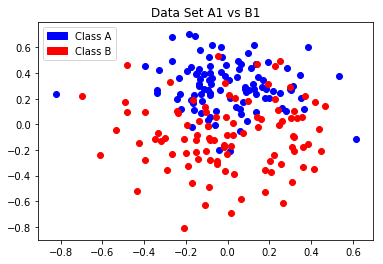

In [835]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

n = 100
meanA = [1.0, 0.3]
meanB = [0.0, -0.1]
sigmaA = 0.2
sigmaB = 0.3

dataA = Data(meanA, sigmaA, n)
dataB = Data(meanB, sigmaB, n)
dataA.x = dataA.x - dataA.x.mean(axis=0)
dataB.x = dataB.x - dataB.x.mean(axis=0) 

randomised_data, inputs, labels = randomise_data(dataA.training_data, dataB.training_data)

plot_data(dataA, dataB)


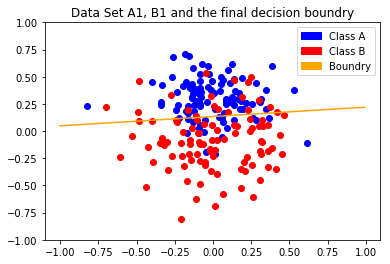

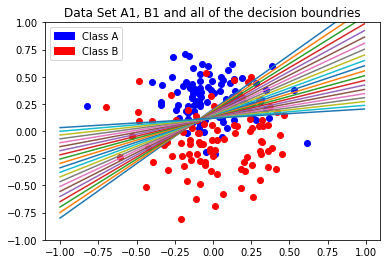

In [836]:
num_nodes = 1
eta = 0.01
epochs = 20
# try [-0.1, 0.2, 0.5], [-0.1],[0.1],[0.2]
weights = np.array([ [-0.1],[0.1],[0.2]])
# Delta Batch
perceptron = Delta(inputs,targets, num_nodes, eta, weights, epochs)
classification_weights = perceptron.train()
plot_decision_boundry(dataA, dataB, perceptron.weights)
plot_decision_boundry2(dataA, dataB, perceptron.weight_set)

In [837]:
perceptron.weights

array([[-0.01007362],
       [ 0.11695433],
       [ 0.01620748]])